<a href="https://colab.research.google.com/github/sharmaine-zvikonyo/Bank-Customer-Churn-Data-Science-ML/blob/main/Bank_customer_churn_DS_%26_ML_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading & set up**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("murilozangari/customer-churn-from-a-bank")

print("Path to dataset files:", path)

df=pd.read_csv(path+"/Churn_Modelling.csv")
print(df.describe())


Path to dataset files: /kaggle/input/customer-churn-from-a-bank
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

    print("Columns already dropped or not found.")

Columns already dropped or not found.


In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Exploratory data analysis**

Check for missing values

In [ ]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


All showed a 0 thus data is clean and has no missing vaules.
Now analyze target variable

In [ ]:
print(df["Exited"].value_counts())
print(df['Exited'].value_counts(normalize=True))

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


## Data Visualization

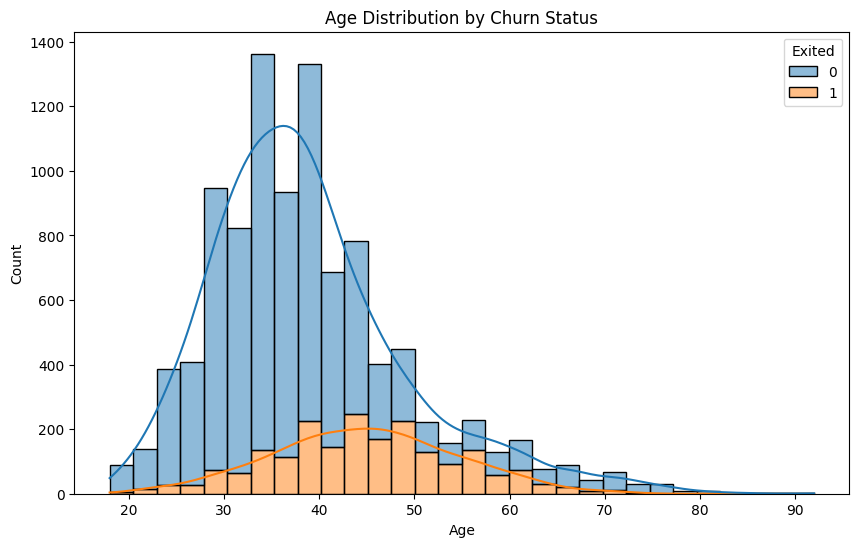

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue='Exited',multiple='stack',bins=30,kde=True)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Tenure Distribution by Churn Status')

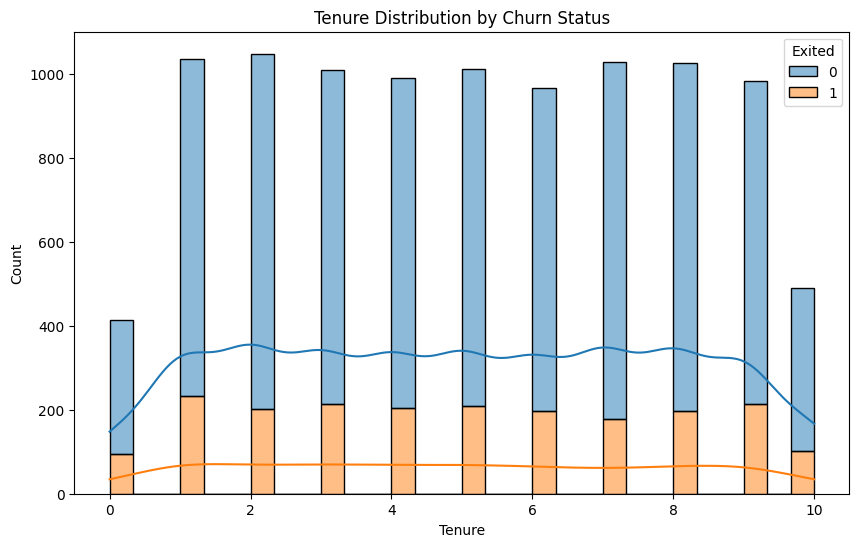

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Tenure", hue='Exited',multiple='stack',bins=30,kde=True)
plt.title("Tenure Distribution by Churn Status")

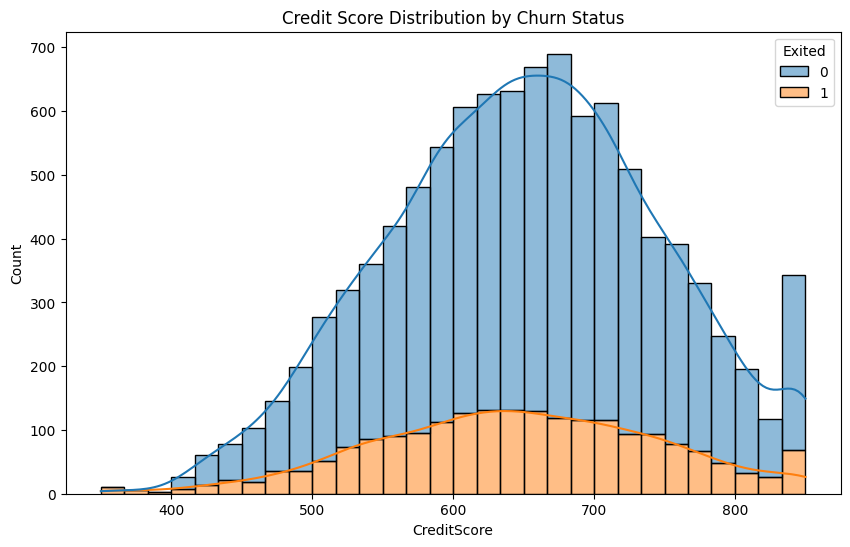

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title("Credit Score Distribution by Churn Status")
sns.histplot(data=df, x="CreditScore", hue='Exited',multiple='stack',bins=30,kde=True)
plt.show()

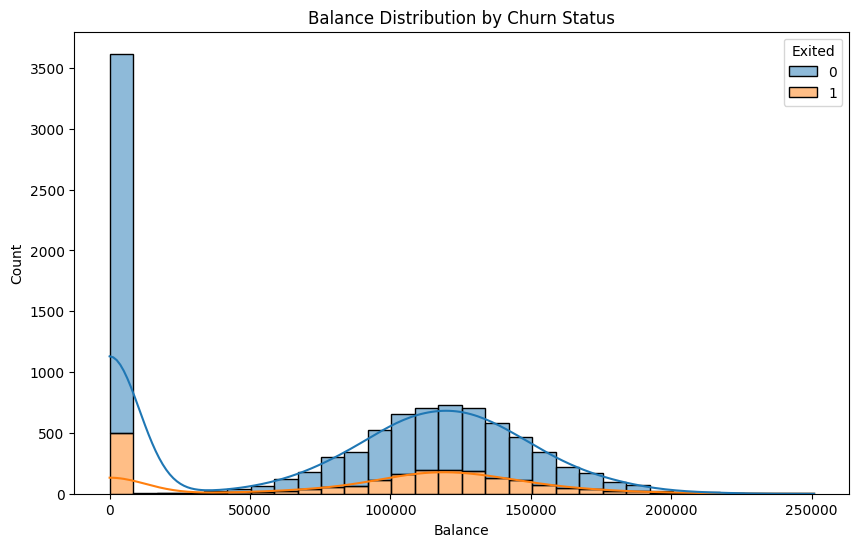

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title("Balance Distribution by Churn Status")
sns.histplot(data=df, x="Balance", hue='Exited',multiple='stack',bins=30,kde=True)
plt.show()

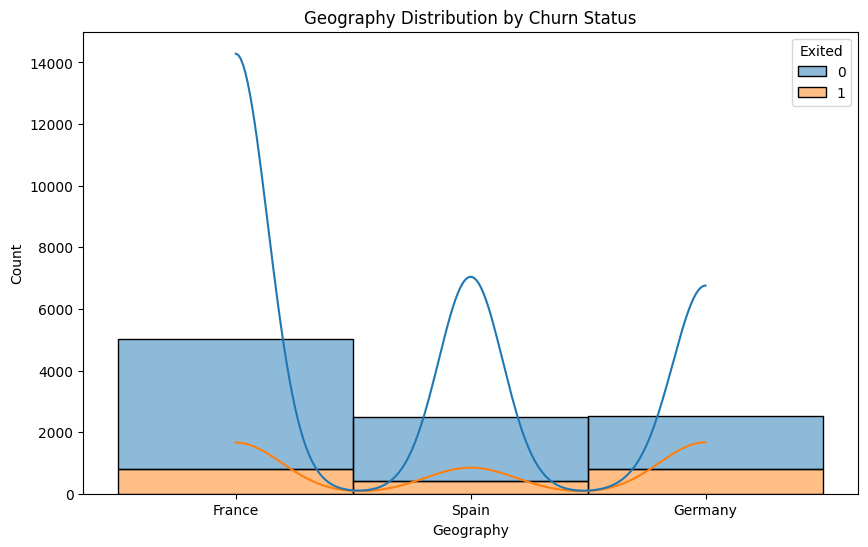

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Geography", hue='Exited',multiple='stack',bins=30,kde=True)
plt.title("Geography Distribution by Churn Status")
plt.show()

# **Machine Learning**

# Convert to numerical format(as algorithm cannot handle text base)

In [ ]:
columns_to_encode = ['Geography','Gender']
existing_columns_to_encode = [col for col in columns_to_encode if col in df.columns]
if existing_columns_to_encode:
    df = pd.get_dummies(df, columns=existing_columns_to_encode, drop_first=True)
else:
    print("Columns already encoded or not found.")

Columns already encoded or not found.


##Splitting the data

separate features and target

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

split data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        Fals

In [ ]:
print("shape of Dataframe:", df.shape)

shape of Dataframe: (10000, 12)


###Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Machine Learning Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Overall accuracy of the model is 87% so improvement of model must be done.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Resampled Class Distribution:")
print(y_train_resampled.value_counts())

Resampled Class Distribution:
Exited
0    6356
1    6356
Name: count, dtype: int64


Retrain model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

balanced_model=RandomForestClassifier(random_state=42)
balanced_model.fit(x_train_resampled, y_train_resampled)

y_pred_balanced = balanced_model.predict(x_test)

print("Classification Report (Balanced Model):")
print(classification_report(y_test, y_pred_balanced))

Classification Report (Balanced Model):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.59      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000



Model is now making more useful predictions by using SMOTE

# **Feature** **Importance**

In [ ]:
import pandas as pd
x_scaled = scaler.transform(x) # Scale the entire x DataFrame
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

Age                  0.236922
EstimatedSalary      0.147558
CreditScore          0.143338
Balance              0.141612
NumOfProducts        0.131486
Tenure               0.082080
IsActiveMember       0.040725
Geography_Germany    0.026190
HasCrCard            0.018454
Gender_Male          0.018421
Geography_Spain      0.013214
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Visualize feature importance

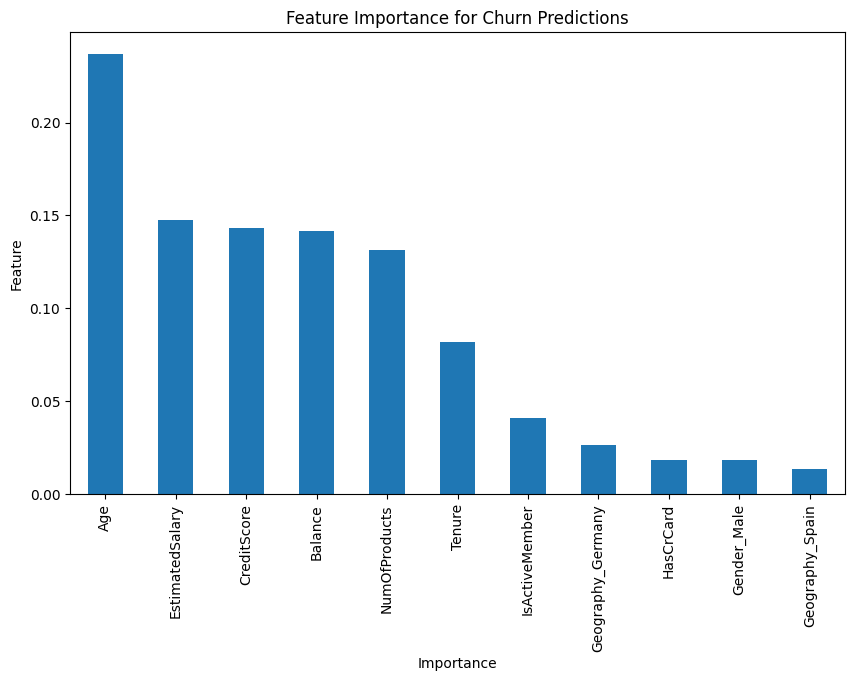

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Churn Predictions')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## **Conclusion**

The bank should focus on retaining customers with high credit scores and those in age groups identified in EDA. Investigate why customers with higher estimated salaries are prone to churning. Offer premium service or better interest rates. Since inactive memebers are a major risk factor, bank should implement programs to increase activity and engagement